In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth = 100



from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [2]:
df = pd.read_csv('../data/data_w_genres.csv')
df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,김효근,0.939000,0.174000,341821.000000,0.321000,0.756000,0.695000,-13.411000,0.042200,138.300000,0.055400,0.000000,3,1,1,[]
32535,나율,0.717000,0.591500,241281.500000,0.473500,0.000000,0.105000,-6.588500,0.053700,107.599000,0.507500,16.000000,1,1,4,[]
32536,미스티,0.416000,0.686000,216715.000000,0.822000,0.000000,0.110000,-6.300000,0.080200,122.047000,0.625000,0.000000,5,0,2,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288000,0.739000,242480.000000,0.475000,0.000000,0.075700,-8.920000,0.379000,81.490000,0.800000,8.000000,2,0,2,[]


In [3]:
df['contains_genre'] = 0



In [4]:
count = 0

for artist in df.genres:
    if len(artist) > 2:
        df.contains_genre[count] = 1
    count += 1

<ipython-input-4-0a470126fced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.contains_genre[count] = 1


In [5]:
df.contains_genre.value_counts()

1    18976
0    13563
Name: contains_genre, dtype: int64

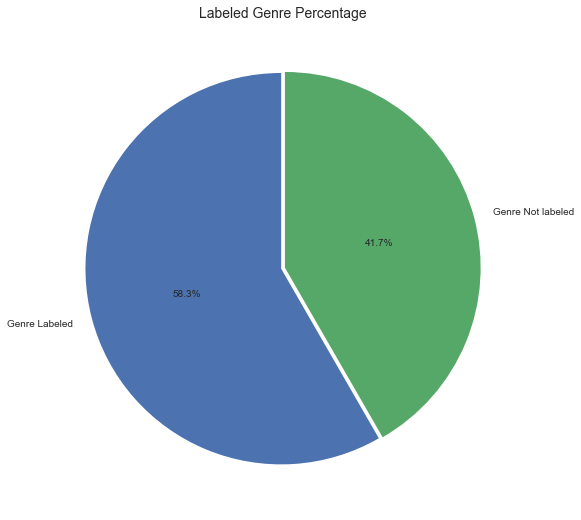

In [6]:
#Using matplotlib

pie, ax = plt.subplots(figsize=[16,9])
labels = ['Genre Labeled', 'Genre Not labeled']
plt.pie(
        x=df.contains_genre.value_counts(), 
        autopct="%.1f%%", 
        explode=[0.01]*2, 
        labels=labels, 
        pctdistance=0.5, 
        colors=['#4c72b0', "#55a868"],
        startangle=90
        )
plt.title("Labeled Genre Percentage", fontsize=14);